In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

**Гипотеза компактности (для классификации)**:
Близкие объекты, как правило, лежат в одном классе.

**Гипотеза непрерывности (для регрессии)**: Близким
объектам соответствуют близкие ответы.

Метод k ближайших соседей (kNN — k nearest neighbours) метрический алгоритм для классификации объектов, основанный на оценивании сходства объектов.
Классифицируемый объект относится к тому классу, которому принадлежат ближайшие к нему объекты обучающей выборки.

Алгоритм:

1 Вычислить расстояние до каждого из объектов обучающей выборки

2 Отобрать $k$ объектов обучающей выборки, расстояние до которых минимально

3 Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди $k$ ближайших соседей

**Достоинства:**
* Простота реализации.
* Классификацию, проведенную алгоритмом, легко интерпретировать путем предъявления пользователю нескольких ближайших объектов.

**Недостатки:**
* Необходимость хранения обучающей выборки целиком.
* Поиск ближайшего соседа предполагает сравнение классифицируемого объекта со всеми объектами выборки

**Выбор $k$**

Малые значения $k$ приведут к тому, что “шум” (выбросы) будет существенно влиять на результаты.

Большие значения усложняют вычисления и искажают логику ближайших соседей, в соответствии с которой ближайшие точки могут принадлежать
одному классу (гипотеза компактности).

Эвристика: $k=\sqrt n$

# Пример использования

In [2]:
url='https://drive.google.com/file/d/1fxO-zxmRcz7CTlN8o55ahqGttUfxRkiI/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                 random_state=42, stratify=y)

In [6]:
param_grid = dict(n_neighbors=np.arange(1, 3 * int(np.ceil(np.sqrt(len(X_train[0]))))))
print(param_grid)

{'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8])}


In [7]:
knn = KNeighborsClassifier(n_neighbors=3)

In [8]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8])},
             scoring='accuracy')

In [9]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.69460784 0.71368778 0.67899698 0.7061086  0.69826546 0.70987934
 0.71772247 0.70422323]


Text(0, 0.5, 'Cross-Validated Accuracy')

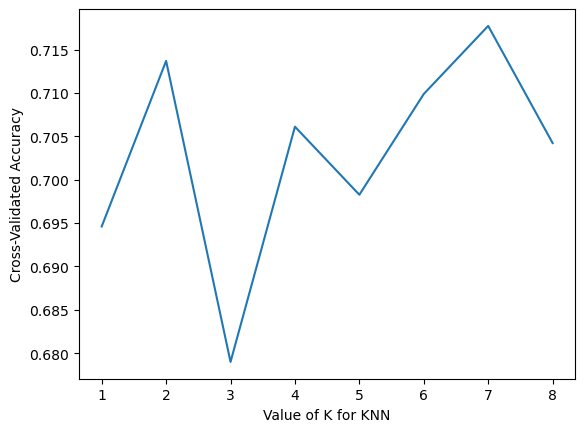

In [10]:
plt.plot(param_grid['n_neighbors'], grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [11]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7177224736048264
{'n_neighbors': 7}
KNeighborsClassifier(n_neighbors=7)


# Задание
Реализовать самостоятельно метод классификации kNN, где использовалась бы метрика Евклидового расстояния, $k=2$.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                 random_state=42, stratify=y)

In [33]:
def euclidean_dist(point1, point2):
    
    return np.sqrt(np.sum((point1 - point2)**2))

In [41]:
def knn(training_data, training_labels, test_data, k):
    pred = []
    for test_point in test_data:
        distances = []
        for i in range(len(training_data)):
            dist = euclidean_dist(test_point, training_data[i])
            distances.append((dist, i))
        
        distances.sort()
        
        neighbors_labels = []
        for i in range(min(k, len(distances))):
            index = distances[i][1] #получаем индекс соседа в обучающих данных
            neighbors_labels.append(training_labels[index])
            
        class_counts = {}
        for label in neighbors_labels:
            if label not in class_counts:
                class_counts[label] = 0
            class_counts[label] += 1
        
        predicted_label = max(class_counts, key=class_counts.get)
        pred.append(predicted_label)
    
    return np.array(pred)

In [48]:
y_pred = knn(X_train, y_train, X_test, k=2)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6692913385826772